# STORE SALES ANALYSIS

In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
store = np.genfromtxt("Datasets/Storesales.csv",delimiter=',',skip_header=1,usecols=[0,1],dtype='str') # # Use column '0','1' representing Store name and data
sales = np.genfromtxt("Datasets/Storesales.csv",delimiter=',',skip_header=1,usecols=2)                 # Use column '2' representing Sales 
columns = np.genfromtxt("Datasets/Storesales.csv",delimiter=',',max_rows=1,dtype='str')                # Use row '1' representing the column names

In [136]:
# Lets create ID's to the store for individual analysis
# Also lets assign id for days as it is feasible to work with numbers than with strings,even though operations with strings are possible 


num_of_entries = sales.shape[0]

day = {'Su':0,'M':1,'Tu':2,'W':3,'Th':4,'F':5,'Sa':6}
day_col = np.array([day[i] for i in list(store[:,1])])

store_name = np.unique(store[:,0])
store_dict = dict(zip(store_name,np.arange(len(store_name))))
store_col = np.array([store_dict[i] for i in list(store[:,0])])

print(store_dict)

day_col = day_col.reshape(num_of_entries,1).astype('int')
store_col = store_col.reshape(num_of_entries,1).astype('int')
sales_col = sales.reshape(num_of_entries,1).astype('float')


{'EAST11': 0, 'EAST14': 1, 'EAST2': 2, 'EAST23': 3, 'EAST26': 4, 'EAST6': 5, 'WEST10': 6, 'WEST17': 7, 'WEST27': 8, 'WEST33': 9, 'WEST35': 10, 'WEST41': 11, 'WEST45': 12, 'WEST47': 13}


In [137]:
new_data = np.hstack([store_col,day_col,sales_col])
np.set_printoptions(threshold=0)
new_data

array([[2.000e+00, 0.000e+00, 1.651e+03],
       [2.000e+00, 1.000e+00, 8.860e+02],
       [2.000e+00, 2.000e+00, 8.060e+02],
       ...,
       [1.300e+01, 4.000e+00, 3.169e+03],
       [1.300e+01, 5.000e+00, 3.462e+03],
       [1.300e+01, 6.000e+00, 5.558e+03]])

## OVERALL CALCULATIONS

In [138]:
# Mean of oerall sales in the city
mean = np.mean(sales)
print("Mean is ", mean)

# Medain of overall sales in the city
median = np.median(sales)
print("Median is", median)

# The huge difference in mean and median represents there are Normal and luxurious sale points in the data

Mean is  2073.8061224489797
Median is 1770.5


#### Total sales on Week days analysis

[Text(0,0,'Sunday'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednessday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday')]

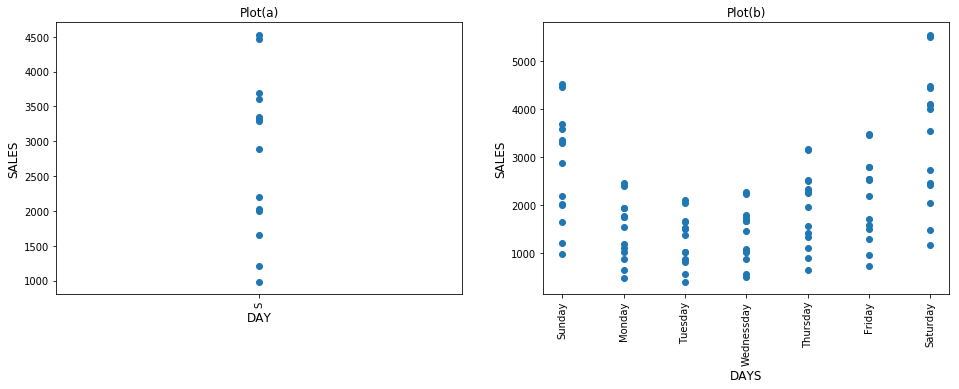

In [139]:
fig,axes = plt.subplots(1,2,figsize=(16,5))


for_day = 0
x = new_data[new_data[:,1]==for_day]           # This is just sale data points for one day 'Sunday (0)' similarly change it to 1 to get for 'Monday' 
x_ticks = x[:,1]
y_ticks = x[:,2]


axes[0].scatter(x_ticks,y_ticks)
axes[1].scatter(new_data[:,1],new_data[:,2])
axes[0].set_title("Plot(a)")
axes[0].set_xlabel("DAY",fontsize=12)
axes[0].set_ylabel("SALES",fontsize=12)
axes[1].set_title("Plot(b)")
axes[0].set_xticks(range(1))
axes[0].set_xticklabels("".join([x for x,y in day.items() if y==for_day]),rotation='vertical')   # To get key from value in day dictionary


axes[1].set_xlabel("DAYS",fontsize=12)
axes[1].set_ylabel("SALES",fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(["Sunday","Monday","Tuesday","Wednessday","Thursday","Friday","Saturday"],rotation='vertical')


#### Plot(a) is similary to GroupBy in SQL.. i.e group by the day of week..
#### From the above plot we can get the highest and lowest sales for a particular day..
#### The second plot Plot(b) is extension of first which shows sales of all the days

### Now lets calculate Total sales on a specific day

[Text(0,0,'Su'),
 Text(0,0,'M'),
 Text(0,0,'Tu'),
 Text(0,0,'W'),
 Text(0,0,'Th'),
 Text(0,0,'F'),
 Text(0,0,'Sa')]

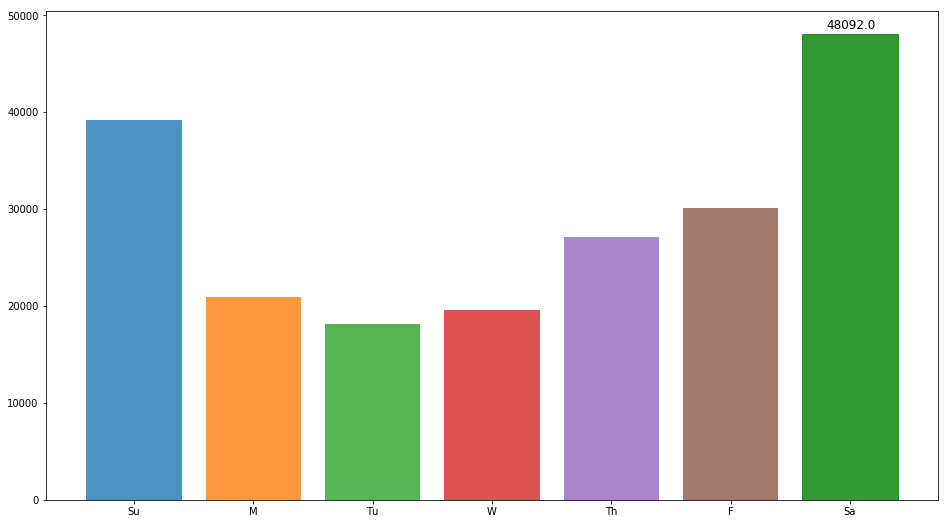

In [140]:

fig,axes = plt.subplots(figsize=(16,9))

for it in day.values(): 
    x = new_data[new_data[:,1] == it]
    g = axes.bar(it,np.sum(x[:,2],axis = 0),alpha = 0.8)
   

g[0].set_color('green')
axes.text(x = 6-0.2,y=np.sum(x[:,2],axis = 0)+500,s=np.sum(x[:,2],axis = 0),fontsize=12)
axes.set_xticks(list(day.values()))
axes.set_xticklabels(day.keys())




#### This shows the total sales on a particular day

### Finding the most popular store

[Text(0,0,'EAST11'),
 Text(0,0,'EAST14'),
 Text(0,0,'EAST2'),
 Text(0,0,'EAST23'),
 Text(0,0,'EAST26'),
 Text(0,0,'EAST6'),
 Text(0,0,'WEST10'),
 Text(0,0,'WEST17'),
 Text(0,0,'WEST27'),
 Text(0,0,'WEST33'),
 Text(0,0,'WEST35'),
 Text(0,0,'WEST41'),
 Text(0,0,'WEST45'),
 Text(0,0,'WEST47')]

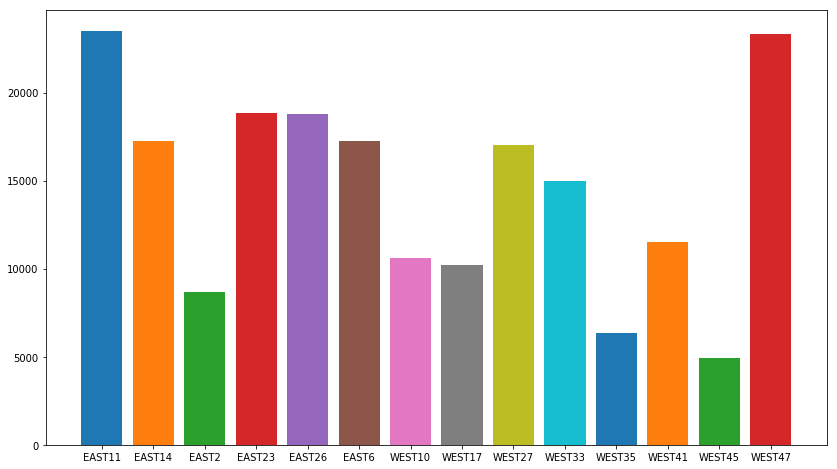

In [141]:
np.unique(new_data[:,0],axis=0)

# For ease of calculation.. lets us modify store_dict dictionary.. instead of accessing keys from values
store_dict_mod = {y:x for x,y in store_dict.items()}

fig,axes = plt.subplots(figsize=(14,8))

for i in store_dict_mod.keys():
    x = new_data[new_data[:,0]==i]
    axes.bar(i,np.sum(x[:,2],axis=0))


axes.set_xticks(range(len(store_dict_mod.keys())))
axes.set_xticklabels(store_dict_mod.values())

### Here it is evident that EAST11 is the popular store in the city

In [ ]:
#Calculate each store on each day

 <matplotlib.axes._subplots.AxesSubplot object at 0x11697470> ...


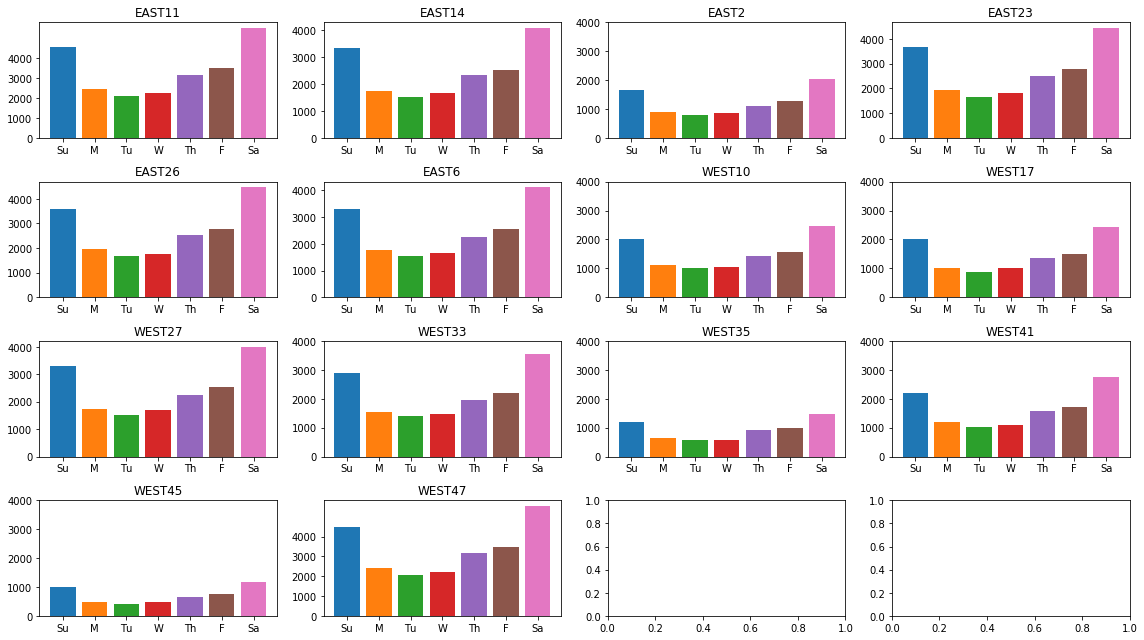

In [216]:
fig,axes = plt.subplots(4,4,figsize=(16,9))

print(axes.flatten())

for sto in store_dict_mod.keys():
    #Filter store :
        store_data = new_data[new_data[:,0]==sto] 
        for day_it in day.values():
            #Filter day
            daywise_data = store_data[store_data[:,1]==day_it]
            axes.flatten()[sto].bar(day_it,np.sum(daywise_data[:,2],axis=0))
            axes.flatten()[sto].set_xticks(range(len(day.keys())))
            axes.flatten()[sto].set_yticks(range(0,5000,1000))
            axes.flatten()[sto].set_xticklabels(day.keys())
            axes.flatten()[sto].set_title(store_dict_mod[sto])


fig.tight_layout()
            
            






 <matplotlib.axes._subplots.AxesSubplot object at 0x0EEB3210> ...


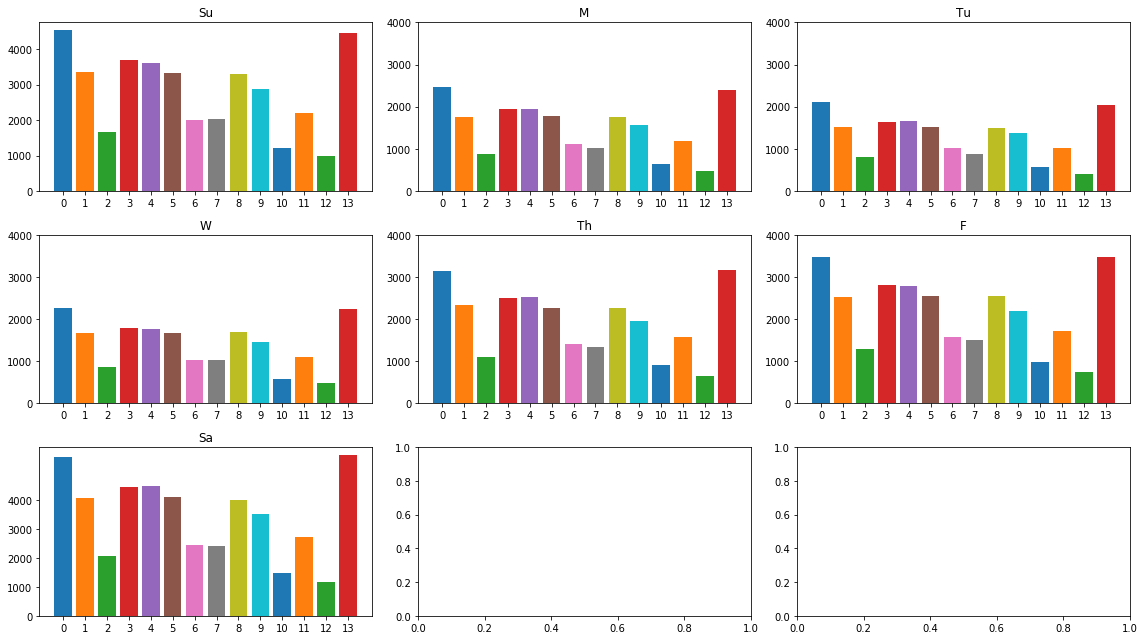

In [217]:
fig,axes = plt.subplots(3,3,figsize=(16,9))

print(axes.flatten())

for day_it in day.values():
    #Filter store :
        daywise_data = new_data[new_data[:,1]==day_it]
        for sto in store_dict_mod.keys():
            #Filter day
            store_data = daywise_data[daywise_data[:,0]==sto]

            axes.flatten()[day_it].bar(sto,np.sum(store_data[:,2],axis=0))
            axes.flatten()[day_it].set_xticks(range(len(store_dict_mod.keys())))
            axes.flatten()[day_it].set_yticks(range(0,5000,1000))
            axes.flatten()[day_it].set_xticklabels(store_dict_mod.keys())
            axes.flatten()[day_it].set_title("".join([i for i,j in day.items() if j == day_it]))


fig.tight_layout()